# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Vittograni Adhigana Akbar]
- **Email:** [mc232d5y0705student.devacademy.id]
- **ID Dicoding:** [MC232D5Y0705]

## Menentukan Pertanyaan Bisnis

- Analisis untuk polutan NO2 dan SO2, apakah berdasarkan kedua polutan tersebut memiliki suatu pola musiman dengan periode kuartal pada Kota Changping?
- Apakah ada korelasi antara O3 dengan Temp pada Kota Changping ?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [ ]:
changping_df = pd.read_csv("PRSA_Data_Changping_20130301-20170228.csv")

**Insight:**
- Membaca isi dataset dari Kota Changping


### Assessing Data

In [ ]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
changping_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,774
PM10,582
SO2,628
NO2,667
CO,1521


In [ ]:
changping_df.duplicated().sum()

0

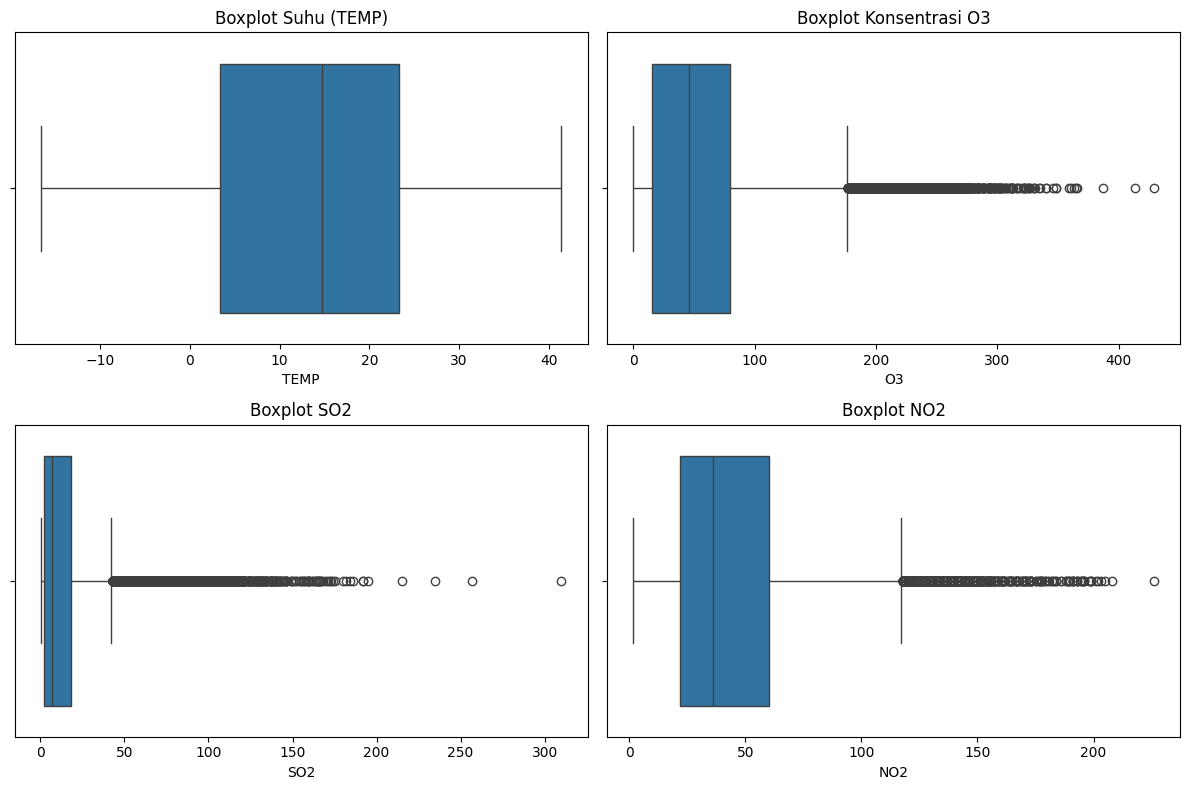

In [ ]:
plt.figure(figsize=(12, 8))  # Sesuaikan ukuran untuk 4 subplot

# Subplot 1: Boxplot TEMP
plt.subplot(2, 2, 1)
sns.boxplot(x=changping_df['TEMP'])
plt.title('Boxplot Suhu (TEMP)')

# Subplot 2: Boxplot O3
plt.subplot(2, 2, 2)
sns.boxplot(x=changping_df['O3'])
plt.title('Boxplot Konsentrasi O3')

# Subplot 3: Boxplot SO2
plt.subplot(2, 2, 3)
sns.boxplot(x=changping_df['SO2'])
plt.title('Boxplot SO2')

# Subplot 4: Boxplot NO2
plt.subplot(2, 2, 4)
sns.boxplot(x=changping_df['NO2'])
plt.title('Boxplot NO2')

plt.tight_layout()  # Supaya tidak saling menimpa
plt.show()

**Insight:**
- .info(), memberikan informasi perihal tipe data jumlah data, dan nilai non-null.
- .isnull().sum(), memberikan informasi banyaknya jumlah data yang hilang.
- .duplicated().sum(), memberikan informasi apakah adanya duplikasi data.
- Boxplot untuk melihat adanya outlier atau tidak.

Setelah melakukan beberapa rangkaian di atas, terdapat hal yang perlu dibersihkan yaitu pada missing value dan outlier, selebihnya tidak ada yang perlu dibersihkan.

### Cleaning Data

Jumlah nilai null setelah dihapus:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


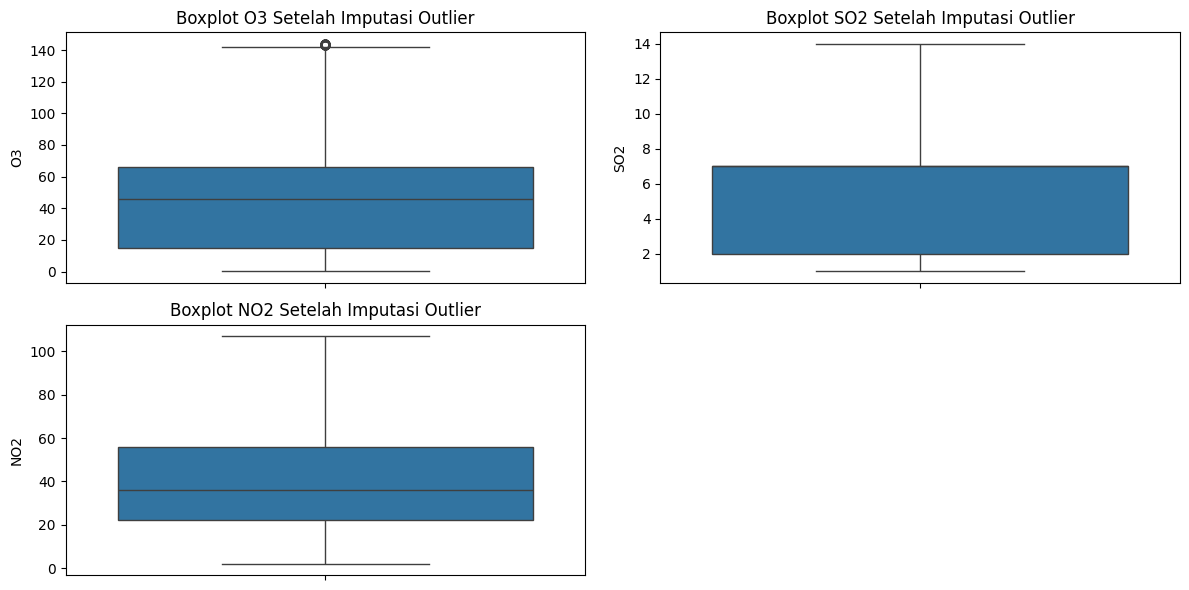

In [ ]:
# Fungsi untuk mengganti outlier dengan median secara iteratif
def impute_outliers_with_median(df, column):
    outlier_exists = True

    while outlier_exists:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if outliers.empty:
            outlier_exists = False
        else:
            median_value = df[column].median()
            df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                                  median_value, df[column])
columns_to_fix = ['O3', 'SO2', 'NO2']

# Iterasi untuk setiap kolom
for col in columns_to_fix:
    impute_outliers_with_median(changping_df, col)

# Menghapus baris yang mengandung null
changping_df.dropna(inplace=True)
print("Jumlah nilai null setelah dihapus:")
print(changping_df.isnull().sum())

# Plot boxplot
plt.figure(figsize=(12, 6))

for i, col in enumerate(columns_to_fix, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=changping_df[col])
    plt.title(f'Boxplot {col} Setelah Imputasi Outlier')
plt.tight_layout()
plt.show()

**Insight:**
- Menghilangkan semua missing value dengan cara dropping, alasannya data yang memiliki missing value cenderung masih sedikit.
- Mengatasi masalah outlier dengan cara imputasi berdasarkan nilai mediannya.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Perlunya melakukan konversi datetime
changping_df['datetime'] = pd.to_datetime(changping_df[['year', 'month', 'day', 'hour']])

# Membuat Kolom baru yang memuat periode kuartal
changping_df['quarter'] = changping_df['datetime'].dt.to_period('Q')

# Menggabungkan data SO2 dan NO2 yang dilanjutkan dengan nilai rata-rata
pollutants = ['SO2', 'NO2']
quarterly_pollution = changping_df.groupby('quarter')[pollutants].mean()
print(quarterly_pollution)

              SO2        NO2
quarter                     
2013Q1   6.851485  48.882603
2013Q2   6.848139  36.078628
2013Q3   5.171965  29.241793
2013Q4   7.204960  46.774291
2014Q1   7.206624  51.689076
2014Q2   5.818916  37.710450
2014Q3   4.068584  34.512833
2014Q4   6.220271  46.673610
2015Q1   6.915031  46.666844
2015Q2   4.358564  29.662300
2015Q3   3.320930  27.659535
2015Q4   5.683972  53.647177
2016Q1   6.670118  47.769412
2016Q2   4.333018  35.970156
2016Q3   2.722593  29.958055
2016Q4   5.761412  53.224941
2017Q1   7.210332  43.023616


In [ ]:
korelasi = changping_df[['TEMP', 'O3']].corr()
print(korelasi)

          TEMP        O3
TEMP  1.000000  0.516283
O3    0.516283  1.000000


**Insight:**
- Terlihata data memiliki alur yang turun naik, perlunya analisis lebih lanjut untuk mengetahui kebenarannya.
- Korelasi yang diperoleh menunjukkan hasil yang positif.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-176-28766607cf66>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(quarterly_pollution.index.astype(str), rotation=45)


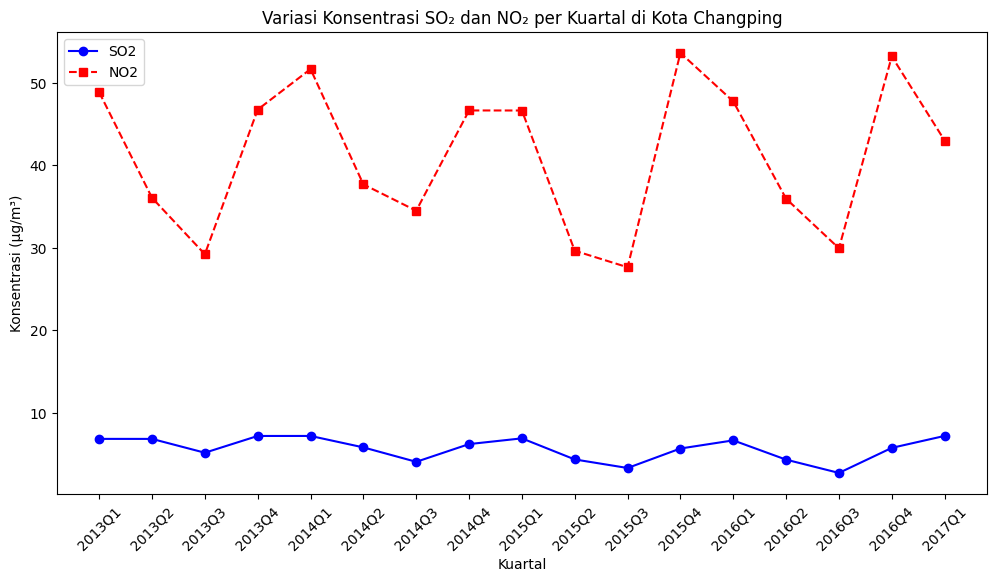

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
# Plot line chart untuk SO2 dan NO2
ax.plot(quarterly_pollution.index.astype(str), quarterly_pollution['SO2'],
        marker='o', linestyle='-', color='blue', label='SO2')

ax.plot(quarterly_pollution.index.astype(str), quarterly_pollution['NO2'],
        marker='s', linestyle='--', color='red', label='NO2')

ax.set_ylabel("Konsentrasi (µg/m³)")
ax.set_xlabel("Kuartal")
ax.set_title("Variasi Konsentrasi SO₂ dan NO₂ per Kuartal di Kota Changping")
ax.set_xticklabels(quarterly_pollution.index.astype(str), rotation=45)
ax.legend()
plt.show()


### Pertanyaan 2:

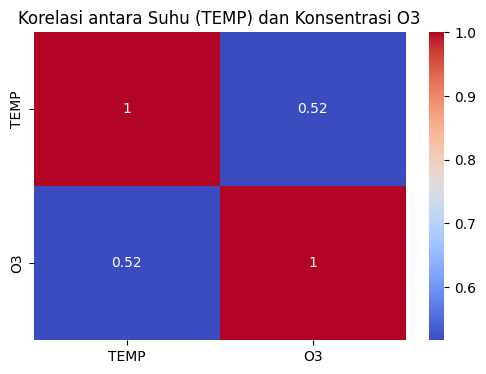

In [ ]:
# Heatmap korelasi
plt.figure(figsize=(6, 4))
sns.heatmap(korelasi, annot=True, cmap='coolwarm')
plt.title('Korelasi antara Suhu (TEMP) dan Konsentrasi O3')
plt.show()

**Insight:**
- Untuk pertanyaan pertama diperoleh grafik yang terdapat pola musiman dan keduanya cenderung memiliki pola yang sama.
- Untuk pertanyaan kedua diperoleh suatu korelasi antara O3 dan Temp.

## Analisis Lanjutan (Opsional)

## Conclusion

- Kesimpulan pertanyaan 1 adalah dapat dilihat secara teliti bahwa terdapat pola musiman, yaitu setiap tahunnya kuartal ke-3 menjadi titik terkecil pada tahun tersebut di mana setelah kuartal ke-3 mengalami lonjakan yang signifikan. Hal tersebut mungkin terjadi berdasarkan faktor eksternal(cuaca, manusia, dll)
- Kesimpulan pertanyaan 2 adalah terdapat korelasi antara O3 dengan Temp yang ditandakan dengan berdasarkan heatmap yang cukup positif. Artinya, ketika suhu meningkat maka konsentrasi O3 cenderung meningkat juga dan sebaliknya. Jadi, terlihat korelasinya.